<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

In [947]:
# imports

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Normalize the dataset
from sklearn.preprocessing import StandardScaler 

# Model
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# acrescente seus imports aqui


<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Lab Kmeans </font></h1>
<hr>

##Caso: **Segmentando Clientes de um Mall**

Aqui você encontrará dados de 200 clientes de uma loja de Shopping com dados de idade, renda, sexo e score de gastos na loja. Você seguimentará esses clientes tentando obter e caracterizar grupos distintos de clientes para poder tomar decisões sobre como atuar sobre esses grupos (campanhas, ofertas de produtos etc.).




In [948]:
# Seu código
df1=pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Mall_Customers.csv')
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exercício. Explore os dados

Note que existe um atributo nos dados que não faz sentido ser incluído no modelo. Exclua esse atributo. Chame a nova base de dados de `df`

In [949]:
df1.shape

(200, 5)

In [950]:
# Missing values
df1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [951]:
# drop the column 'Age'
df = df1.drop(columns=['Age'])

In [952]:
# column names
df.columns

Index(['CustomerID', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [953]:
df

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,Male,15,39
1,2,Male,15,81
2,3,Female,16,6
3,4,Female,16,77
4,5,Female,17,40
...,...,...,...,...
195,196,Female,120,79
196,197,Female,126,28
197,198,Male,126,74
198,199,Male,137,18


## Exercício. Definindo a entrada `X`

As entradas `X` do `kmeans` precisam ser numéricas pois ele emprega a média das distâncias dos elementos. Converta o atributo `Gender` numérico, com 'Male' = 1 e 'Female' = 0.

In [954]:
# Set the input X to the K-Means.
X = df

# set Label Encoder
le = LabelEncoder()

# Fit the Label Encoder
le.fit(X['Gender'])

# Transform the Gender column
X['Gender'] = le.transform(X['Gender'])

In [955]:
X.head(20)

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,1,15,39
1,2,1,15,81
2,3,0,16,6
3,4,0,16,77
4,5,0,17,40
5,6,0,17,76
6,7,0,18,6
7,8,0,18,94
8,9,1,19,3
9,10,0,19,72


## Exercício. Normalize os dados `Scaling`

O `kmeans` emprega distâncias e, portanto, é sensível à escala dos dados. Normalize os dados de `X` com o método `StandardScaler()` ou a função `scale( )` (solução mais simples)\*.


In [956]:
# Seu código
scaler = StandardScaler().fit(X)

X_matrix = scaler.transform(X)
X_matrix


array([[-1.7234121 ,  1.12815215, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.54815205,  1.04041783],
       [-1.48092195,  1.12815215, -1.54815205, -1.44416206],
       [-1.46360123,  1.12815215, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

Ótimo, seus dados agora devem aparecer todos com média 0 e desvio padrão 1.

In [957]:
df = pd.DataFrame(X_matrix,columns=df.columns, index=df.index)
df.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.738999,-0.434801
1,-1.706091,1.128152,-1.738999,1.195704
2,-1.688771,-0.886405,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.700830,1.040418
4,-1.654129,-0.886405,-1.662660,-0.395980


In [958]:
df.describe()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,0.000000,3.108624e-17,-2.131628e-16,-1.465494e-16
std,1.002509,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.723412,-8.864053e-01,-1.738999e+00,-1.910021e+00
25%,-0.861706,-8.864053e-01,-7.275093e-01,-5.997931e-01
50%,0.000000,-8.864053e-01,3.587926e-02,-7.764312e-03
75%,0.861706,1.128152e+00,6.656748e-01,8.851316e-01
max,1.723412,1.128152e+00,2.917671e+00,1.894492e+00


## Exercício. Determine o número *ideal* de Clusters

O método da inércia ou regra do cotovelo, permite determinar o melhor número de cluster. Determine o número de cluster executando o código apresentado na teoria. Ele não precisa ser modificado se os dados de entradas estão corretamente em `X`.

\*nota: existem outras métricas e critérios para decidir o número de Clusters, por exemplo, o `Silhouette`. Para os nossos propósitos, entretanto, será suficiente empregarmos a regra do cotovelo com base na inércia dos grupos.

In [959]:
# Method of inertia to find the ideal of clusters.
inertia = []
for k in range(1, 11):
    clf = KMeans(n_clusters = k , random_state= 123)
    clf.fit(X)
    inertia.append(clf.inertia_)

In [960]:
pd.DataFrame({"k":list(range(1 , 11)),
              "inércia": inertia})

,k,inércia
0,1,936680.560000
1,2,348465.800000
2,3,233924.852373
3,4,159618.251782
4,5,125402.894137
5,6,91918.801324
6,7,72507.166373
7,8,55605.804015
8,9,48247.662409
9,10,43734.019109


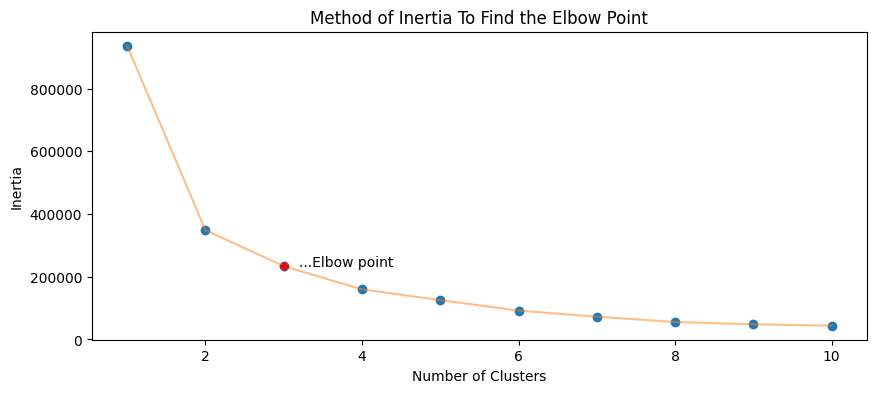

In [961]:
plt.figure(1 , figsize = (10 ,4))
plt.title('Method of Inertia To Find the Elbow Point')
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.text(3 + 0.2 , inertia[2] , '...Elbow point')

plt.show()

## Exercício. Declarando o modelo

Vamos segmentar nossos clientes em 3 grupos (na dúvida usar 3). Não deixe de empregar o `random_state= 123` na função `KMeans` para obter as mesmas respostas.

In [962]:
clf = KMeans(n_clusters = 3 , random_state= 123) # Declara o modelo
clf.fit(X) # Ajustar o modelo


KMeans(n_clusters=3, random_state=123)

## Exercício. Identificando na base de dados os grupos

Adicione uma nova coluna ao dataframe (nome: `cluster`) atribuindo os grupos `labels` obtidos acima para facilitar a identificação do grupo de cada cliente.

In [963]:
# To see the clusters.
labels = clf.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [964]:
# To see the centers
centroids = clf.cluster_centers_
print(centroids)

[[103.           0.44927536  61.52173913  49.5942029 ]
 [169.           0.47619048  90.20634921  50.93650794]
 [ 34.5          0.39705882  32.11764706  50.13235294]]


In [965]:
df = pd.concat([df.reset_index(drop=True),pd.DataFrame(labels)], axis=1)
df.head(20)

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),0
0,-1.723412,1.128152,-1.738999,-0.434801,2
1,-1.706091,1.128152,-1.738999,1.195704,2
2,-1.688771,-0.886405,-1.700830,-1.715913,2
3,-1.671450,-0.886405,-1.700830,1.040418,2
4,-1.654129,-0.886405,-1.662660,-0.395980,2
5,-1.636808,-0.886405,-1.662660,1.001596,2
6,-1.619488,-0.886405,-1.624491,-1.715913,2
7,-1.602167,-0.886405,-1.624491,1.700384,2
8,-1.584846,1.128152,-1.586321,-1.832378,2
9,-1.567526,-0.886405,-1.586321,0.846310,2


### A quais grupos pertencem os clientes de ID 8 e 11?

In [966]:
df.columns

Index(['CustomerID', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)',
       0],
      dtype='object')

In [967]:
df = df.rename(columns={0: 'cluster'})

In [968]:
#ID 8
print(df.loc[[7]]) 

   CustomerID    Gender  Annual Income (k$)  Spending Score (1-100)  cluster
7   -1.602167 -0.886405           -1.624491                1.700384        2


In [969]:
#ID 11
print(df.loc[[10]]) 

    CustomerID    Gender  Annual Income (k$)  Spending Score (1-100)  cluster
10   -1.550205  1.128152           -1.586321                -1.40534        2


In [970]:
df['cluster'].value_counts(normalize=True).map('{:.2%}'.format)

0    34.50%
2    34.00%
1    31.50%
Name: cluster, dtype: object

<Axes: xlabel='cluster', ylabel='count'>

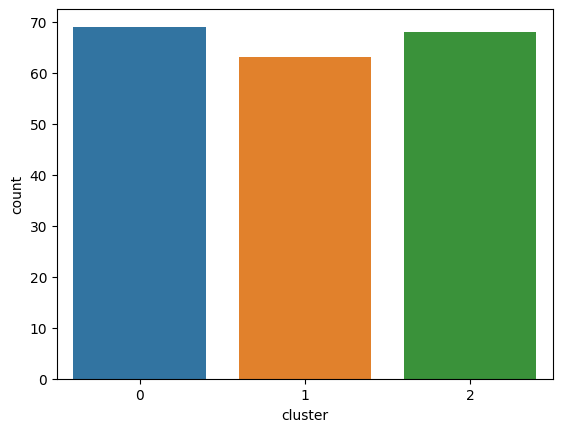

In [971]:
sns.countplot(x=df["cluster"])

In [972]:
lables = df['cluster']
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

## Exercício. Caracterizando os grupos

O que exatamente representam esses grupos de clientes numerados 0, 1 e 2? Quais são as distinções que podem ser identificadas entre eles?

Uma maneira de abordar essa questão é examinar as médias dos valores associados a cada grupo e identificar as características que diferenciam um cliente médio de um grupo dos outros.

Empregue o modelo da teoria para exibir as médias dos valores de cada grupo e tente identificar que grupos de clientes estão sendo formados.

In [973]:
df= pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Mall_Customers.csv',index_col=0)
df.head(15)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [974]:
# drop the column 'Age'
df = df.drop(columns=['Age'])

In [975]:
# the cluster to the dataframe
df['cluster'] = labels
df.head(15)

,Gender,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,
1,Male,15,39,2
2,Male,15,81,2
3,Female,16,6,2
4,Female,16,77,2
5,Female,17,40,2
6,Female,17,76,2
7,Female,18,6,2
8,Female,18,94,2
9,Male,19,3,2


In [976]:
df.groupby('cluster').mean()

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,61.521739,49.594203
1,90.206349,50.936508
2,32.117647,50.132353


In [977]:
g = pd.DataFrame( df.groupby('cluster').mean() ).reset_index()
g

,cluster,Annual Income (k$),Spending Score (1-100)
0,0,61.521739,49.594203
1,1,90.206349,50.936508
2,2,32.117647,50.132353


#### Utilizando os grupos

* Cenário **A**. A loja, em uma campanha de marketing, quer então presentear aluguns clientes com algo score com produtos para cabelos brancos. Para qual grupo/grupos ela deveria enviar os produtos?

* Cenário **B**. Ela ainda quer fazer uma oferta de produtos de celulares modernos e de luxo. Para qual grupo/grupos ela deveria ofertar esses produtos para maximizar sua chance de vendas?
